In [11]:
import tensorflow as tf
print(tf.__version__)
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator

2.9.0


In [12]:
train_dir = 'tourism_destination_2/tourism_destination/train_data/'
validation_dir = 'tourism_destination_2/tourism_destination/validation_data/'

In [16]:
SIZE = (150, 150, 3)
# Create the base model from the pre-trained model MobileNet V2 which is trained on imagenet Dataset
# which consists of 1.2M labelled images.
imagenet = tf.keras.applications.MobileNetV2(input_shape=SIZE,
                                               include_top=False,
                                               weights='imagenet')
#To tell Tf not to adjust weigths of imagenet model which are already trained
imagenet.trainable = False
#model Summary
imagenet.summary()
#Defining New Model with imagenet as the Base Model using Sequential Api
model = tf.keras.models.Sequential([
    imagenet,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(16, activation='softmax')
])

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 75, 75, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 75, 75, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 75, 75, 32)   0           ['bn_Conv1[0][

In [21]:

#Using ImageDataGenerator to ease Data preparation as it lables images based on Folder Name which is ideal for the way Data Set is arranged
TRAINING_DIR = train_dir
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = validation_dir
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))
#Using Adam as it works well with image classification and can adjust Learning rate while training unlike
#GradientDescentOptimizer where manual LR tuning needs to be done.
#Using sparse_categorical_crossentropy as Loss function for similar reasons.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit_generator(train_generator,
                              epochs=100,
                              verbose=1,
                              validation_data=validation_generator)
#Saving Model for future Predictions


Found 1240 images belonging to 16 classes.
Found 273 images belonging to 16 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 16)                20496     
                                                                 
Total params: 2,278,480
Trainable params: 20,496
Non-trainable params: 2,257,984
_________________________________________________________________


C:\Users\CATURW~1\AppData\Local\Temp/ipykernel_2664/2375073325.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/100
13/13 [==============================] - 20s 1s/step - loss: 0.2118 - accuracy: 0.9395 - val_loss: 0.2426 - val_accuracy: 0.9194
Epoch 2/100
13/13 [==============================] - 16s 1s/step - loss: 0.2015 - accuracy: 0.9403 - val_loss: 0.2368 - val_accuracy: 0.9194
Epoch 3/100
13/13 [==============================] - 16s 1s/step - loss: 0.2092 - accuracy: 0.9331 - val_loss: 0.2109 - val_accuracy: 0.9231
Epoch 4/100
13/13 [==============================] - 16s 1s/step - loss: 0.1882 - accuracy: 0.9468 - val_loss: 0.2032 - val_accuracy: 0.9414
Epoch 5/100
13/13 [==============================] - 16s 1s/step - loss: 0.2036 - accuracy: 0.9395 - val_loss: 0.2204 - val_accuracy: 0.9194
Epoch 6/100
13/13 [==============================] - 16s 1s/step - loss: 0.1849 - accuracy: 0.9508 - val_loss: 0.2198 - val_accuracy: 0.9231
Epoch 7/100
13/13 [==============================] - 16s 1s/step - loss: 0.1819 - accuracy: 0.9540 - val_loss: 0.2261 - val_accuracy: 0.9231
Epoch 8/100
1

In [22]:
model.save('TLmodelv2.h5')

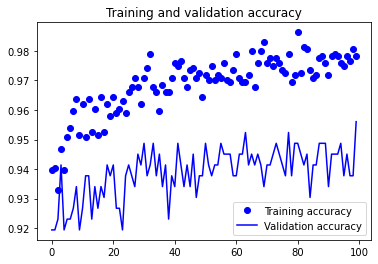

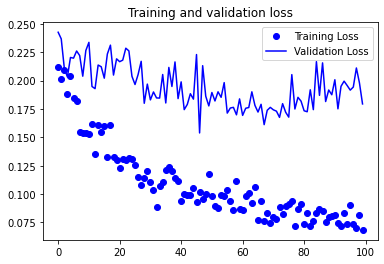

In [23]:
import matplotlib.pyplot as plt
# plot the summary training
def plot_loss_acc(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_loss_acc(history)